# Machine Learning Capstone Project

# Data Exploration

In [1]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import os, random, cv2


TRAIN_DIR = 'data/'
TEST_DIR = 'test1/'

# load the full dataset
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] 
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]
# load the full test set
test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]
test_save = test_images
# print the number of images loaded for both training and testing
print('train_images.shape | {0}'.format(len(train_images)))
print('test_images.shape   | {0}'.format(len(test_images)))

train_images.shape | 25000
test_images.shape   | 12500


In [2]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
CHANNELS = 3
train_target = []
test_images = test_images[:5000]
# slice datasets for memory efficiency on Kaggle Kernels, delete if using full dataset
train_images = train_dogs[:6500] + train_cats[:6500]
train_targets = np.append(np.ones(6500), np.zeros(6500))

#random.shuffle(train_images)
#train_images, train_targets = shuffle(train_images, train_targets, random_state=0)

# split the dataset into training and testing
train_images, valid_images, train_targets, valid_targets = train_test_split(train_images, train_targets, test_size=0.20, random_state=10)


print("Train shape: {}".format(len(train_images)))
print("valid shape: {}".format(len(valid_images)))
print("Test shape: {}".format(len(test_images)))

Train shape: 10400
valid shape: 2600
Test shape: 5000


# Data Pre-processing

In [ ]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_images = paths_to_tensor(train_images).astype('float32')/255
valid_images = paths_to_tensor(valid_images).astype('float32')/255
test_images = paths_to_tensor(test_images[:100]).astype('float32')/255

Using TensorFlow backend.
100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 43.81it/s]


### Benchmark Implementation

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import plot_model

model = Sequential()

### TODO: Define your architecture.
# First Convolutional Layer
model.add(Conv2D(16, kernel_size=(2, 2), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

# Fully connected layer
model.add(Dense(2, activation='softmax'))

model.summary()

# compile the benchmark architecture
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Benchmark

from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 4

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.benchmark_from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

history_cnn = model.fit(train_images[:10000], train_targets[:10000], 
          validation_data=(valid_images[:2500], valid_targets[:2500]),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 223, 223, 16)      208       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 197136)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 394274    
Total params: 394,482.0
Trainable params: 394,482.0
Non-trainable params: 0.0
_________________________________________________________________
Train on 10000 samples, validate on 2500 samples
Epoch 1/4
10000/10000 [==============================] - 679s - loss: 8.0509 - acc: 0.4995 - val_loss: 7.9946 - val_acc: 0.5040
Epoch 2/4
10000/10000 [==============================] - 564s - loss: 8.0639 - acc: 0

### (IMPLEMENTATION) Model Architecture

In [6]:
model = Sequential()

### TODO: Define your architecture.
# First Convolutional Layer
model.add(Conv2D(16, kernel_size=(2, 2), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 2nd Convolutional Layer
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 3rd Convolutional Layer
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# Global average pooling layer
#model.add(GlobalAveragePooling2D())  
# Fully connected layer
model.add(Dense(2, activation='softmax'))

model.summary()
#plot_model(model, to_file='model.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 223, 223, 16)      208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 110, 110, 32)      2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 54, 54, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 64)        16448     
__________

### Compile the Model

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

In [9]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 4

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_new_scratch.hdf5', 
                               verbose=1, save_best_only=True)

history_cnn = model.fit(train_images[:10000], train_targets[:10000], 
          validation_data=(valid_images[:2500], valid_targets[:2500]),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 10000 samples, validate on 2500 samples
Epoch 1/4
10000/10000 [==============================] - 895s - loss: 0.3861 - acc: 0.8323 - val_loss: 0.3732 - val_acc: 0.8300
Epoch 2/4
10000/10000 [==============================] - 822s - loss: 0.3396 - acc: 0.8522 - val_loss: 0.3516 - val_acc: 0.8460
Epoch 3/4
10000/10000 [==============================] - 777s - loss: 0.2937 - acc: 0.8730 - val_loss: 0.4258 - val_acc: 0.8136
Epoch 4/4
10000/10000 [==============================] - 769s - loss: 0.2515 - acc: 0.8918 - val_loss: 0.3762 - val_acc: 0.8384


### Load the Model with the Best Validation Loss and plot Loss and Accuracy curves

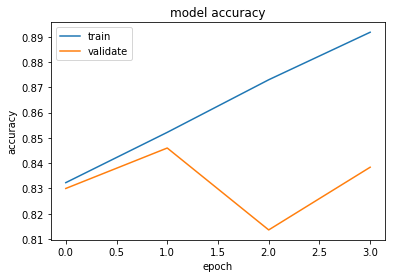

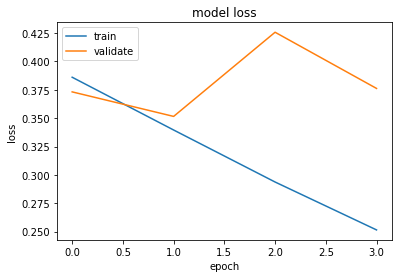

In [10]:
import matplotlib.pyplot as plt   
%matplotlib inline 
model.load_weights('saved_models/weights.best.from_new_scratch.hdf5')

# summarize history for accuracy
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

### Test the Model

In [13]:
test_images = paths_to_tensor(test_images[:25]).astype('float32')/255

100%|█████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 233.02it/s]


In [28]:
model.load_weights('saved_models/weights.best.from_new_scratch.hdf5')
# get the prediction in test set
predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_images]

### Format for Kaggle submission

This image contains dog


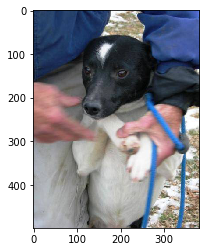

------------------------------------------------
This image contains cat


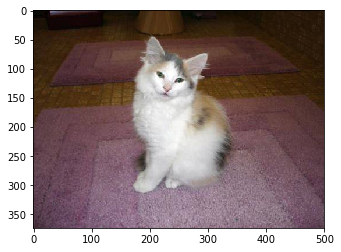

------------------------------------------------
This image contains cat


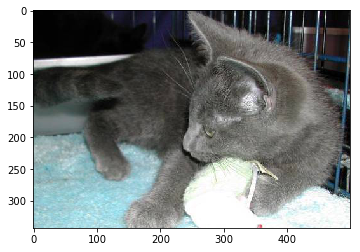

------------------------------------------------
This image contains dog


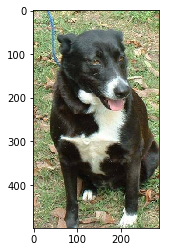

------------------------------------------------
This image contains dog


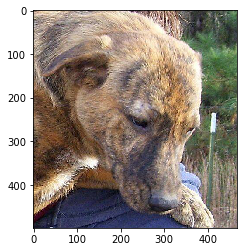

------------------------------------------------
This image contains dog


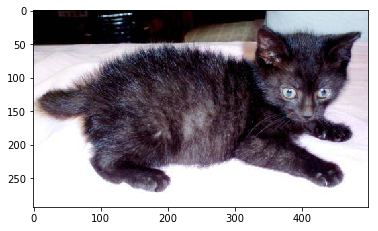

------------------------------------------------
This image contains cat


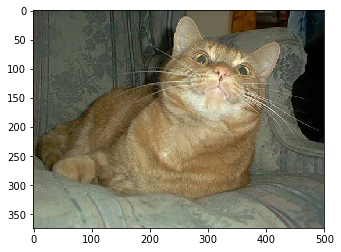

------------------------------------------------
This image contains dog


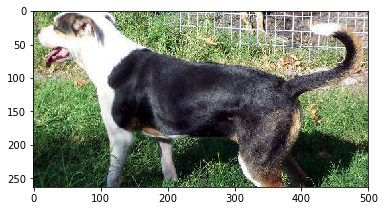

------------------------------------------------
This image contains cat


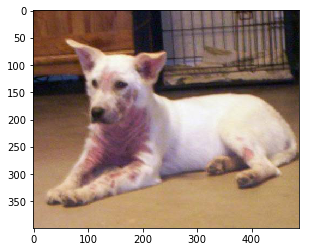

------------------------------------------------
This image contains cat


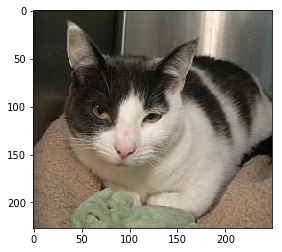

------------------------------------------------
This image contains cat


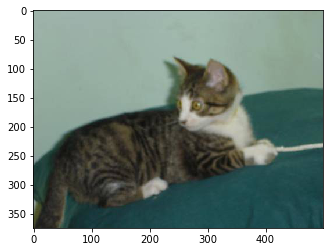

------------------------------------------------
This image contains cat


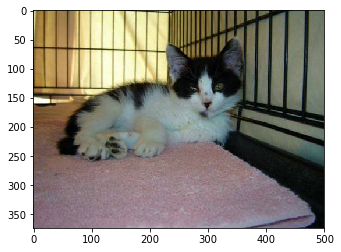

------------------------------------------------
This image contains cat


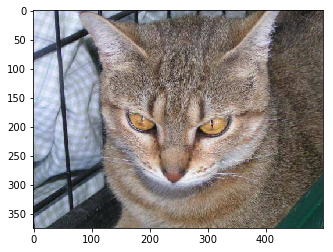

------------------------------------------------
This image contains cat


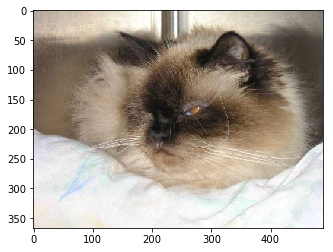

------------------------------------------------
This image contains cat


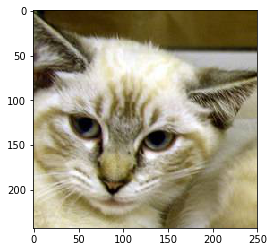

------------------------------------------------
This image contains dog


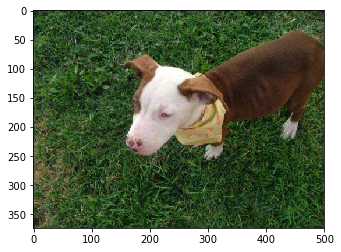

------------------------------------------------
This image contains dog


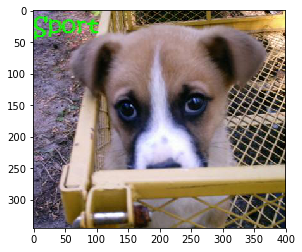

------------------------------------------------
This image contains cat


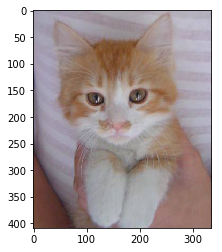

------------------------------------------------
This image contains dog


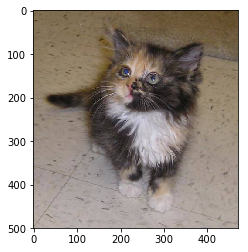

------------------------------------------------
This image contains cat


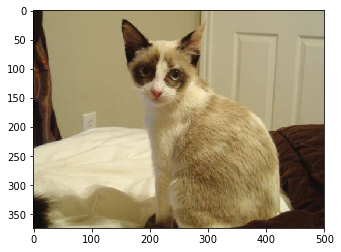

------------------------------------------------
This image contains dog


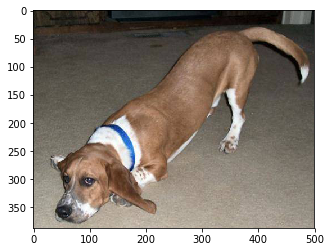

------------------------------------------------
This image contains cat


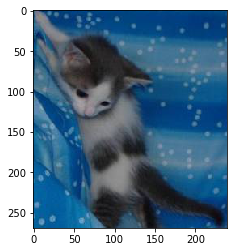

------------------------------------------------
This image contains cat


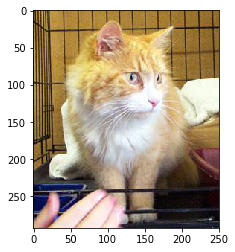

------------------------------------------------
This image contains cat


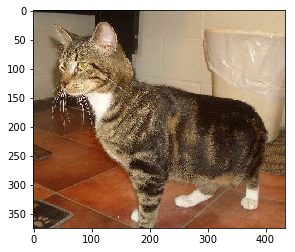

------------------------------------------------
This image contains cat


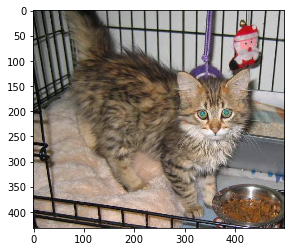

------------------------------------------------


In [26]:
# show an images
def show_image(img_path):
    img = cv2.imread(img_path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

def cat_dog_prediction(test_images, predictions):
    # test human face is detected
    for i in range(len(predictions)): 
        if predictions[i] == 1:
            print("This image contains dog")
            show_image(test_images[i]) # display the image
        else:
            print("This image contains cat")
            show_image(test_images[i]) # display the image
        print("------------------------------------------------")

cat_dog_prediction(test_save[:25], predictions)

Our model is able to predict correctly 22/25 on the test images. Which give us an accuracy of 88%.  

In [23]:
# 
with open("submission_model_1.csv","w") as f:
    f.write("id,label\n")
    for i in range(len(predictions)):
        f.write(str(i+1)+","+str(predictions[i])+"\n")
f.close()

[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0]
